In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [48]:
#on charge les données
plant_data = pd.read_csv('data_viz_species_data.csv')
# retirer valurs manquantes
plant_data.head()

,id,FAMILY,STRATUM,REGION OF ORIGIN,TYPE OF ECOSYSTEM,DISTRIBUTION,BIOME,LIFE CYCLE,ENVIRONMENTAL TOLERANCE,LIGHT REQUIREMENT,CO BENEFITS,SIZE,DIAMETER,SEEDS/KG
0,Name name,NaN,"Shrub,Tree,Liana,Herb,Subshrub,Palm",Native region,NaN,"Countries,Continent","Mata Atlântica,Amazônia","Perennial,Annual,Biannual","Drought,Acid soil,Degraded soil,Sandy soil,Var...","Low,Medium,High","Medicinal,Manure,Food,Wood,Material,Biodiversi...",m,cm,unit/kg
1,ce584b94-ddbe-40af-94e9-6d8180aad3b2,Brassicaceae,Herb,NaN,Any ecosystem,NaN,NaN,Annual,"Drought,Temperature",NaN,"Food,Medicinal",20-30,NaN,100000
2,c0853870-94a0-4d01-a2ca-8b04b225dee4,Boraginaceae,Tree,"Central America,French Guiana,Argentina","Amazon rainforest,Tropical forests","Central America,Tanzania,Kenya,West Indies,",Amani Nature Reserve,Perennial,NaN,NaN,"Wood,Shade,Food,Medicinal,Biofuel",15-45,35-100,71000
3,90540466-2500-4b8e-8068-504601819e20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8e582f5d-df18-49a7-bc93-f262b92ef804,Annonaceae,Shrub,NaN,Amazon rainforest,NaN,Amazonia,NaN,NaN,NaN,NaN,NaN,NaN,4000


In [50]:
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       135 non-null    object
 1   FAMILY                   126 non-null    object
 2   STRATUM                  127 non-null    object
 3   REGION OF ORIGIN         47 non-null     object
 4   TYPE OF ECOSYSTEM        98 non-null     object
 5   DISTRIBUTION             69 non-null     object
 6   BIOME                    40 non-null     object
 7   LIFE CYCLE               65 non-null     object
 8   ENVIRONMENTAL TOLERANCE  45 non-null     object
 9   LIGHT REQUIREMENT        10 non-null     object
 10  CO BENEFITS              75 non-null     object
 11  SIZE                     92 non-null     object
 12  DIAMETER                 22 non-null     object
 13  SEEDS/KG                 109 non-null    object
dtypes: object(14)
memory usage: 14.9+ KB


In [49]:
#famille les plus représentées
most_represented_families = plant_data['FAMILY'].value_counts()
most_represented_families.head(5)


FAMILY
Fabaceae         58
Solanaceae        6
Bignoniaceae      6
Annonaceae        5
Euphorbiaceae     5
Name: count, dtype: int64

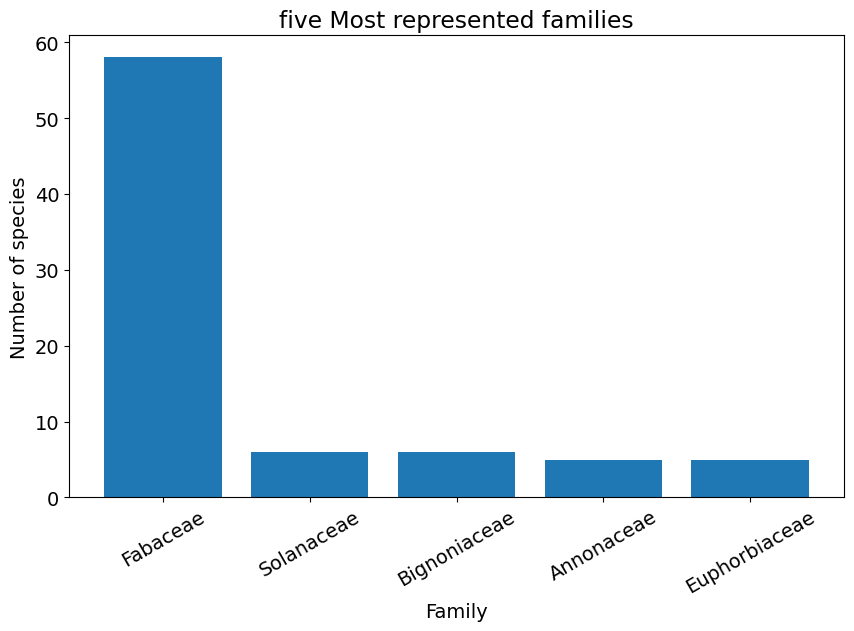

In [35]:
#plot the more represented families
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.bar(most_represented_families.head(5).index, most_represented_families.head(5).values)
#most_represented_families.head(5).plot(kind='bar')
plt.title('five Most represented families')
plt.ylabel('Number of species')
plt.xticks(rotation=30)
plt.xlabel('Family')
plt.show()


In [96]:
#list all the differents cobenefits and potentiel duplicates
#plant_data['CO BENEFITS'].unique()

cobenefits = plant_data['CO BENEFITS']
cobenefits = cobenefits.dropna()
result = []
for co in cobenefits:
        #print(cobenefits[i])
    x = co.split(',')
    for j in x:
        result.append(j)

print(result) 




['Medicinal', 'Manure', 'Food', 'Wood', 'Material', 'Biodiversity', 'Water supply', 'Patrimonial', 'Cosmetics', 'Ornamental', 'Food', 'Medicinal', 'Wood', 'Shade', 'Food', 'Medicinal', 'Biofuel', 'Material', 'Food', 'Medicinal', 'Medicinal', 'Biodiversity', 'Medicinal', 'Biodiversity', 'Food', 'Medicinal', 'Biodiversity', 'Material (with fruit)', 'Medicinal', 'Food', 'Medicinal', 'Manure', 'Biodiversity', 'Food', 'Material (with fruit)', 'Biodiversity', 'Food', 'Medicinal', 'Medicinal', 'Material', 'Medicinal', 'Edible', 'Manure', 'Shade', 'Wood', 'Fodder', 'Medicinal', 'Wood', 'Biodiversity', 'Material (with fruit)', 'Medicinal', 'Soil quality', 'Food', 'Medicinal', 'Medicinal', 'Biodiversity', 'Food', 'Medicinal', 'Wood', 'Medicinal', 'Shade', 'Food', 'Medicinal', 'Medicinal', 'soap-substitute', 'ground cover ', 'Biodiversity', 'Medicinal', 'Biodiversity', 'Material (with fruit)', 'Medicinal', 'Biodiversity', 'Material (with fruit)', 'Medicinal', 'Medicinal', 'Wood', 'Medicinal', 'Or

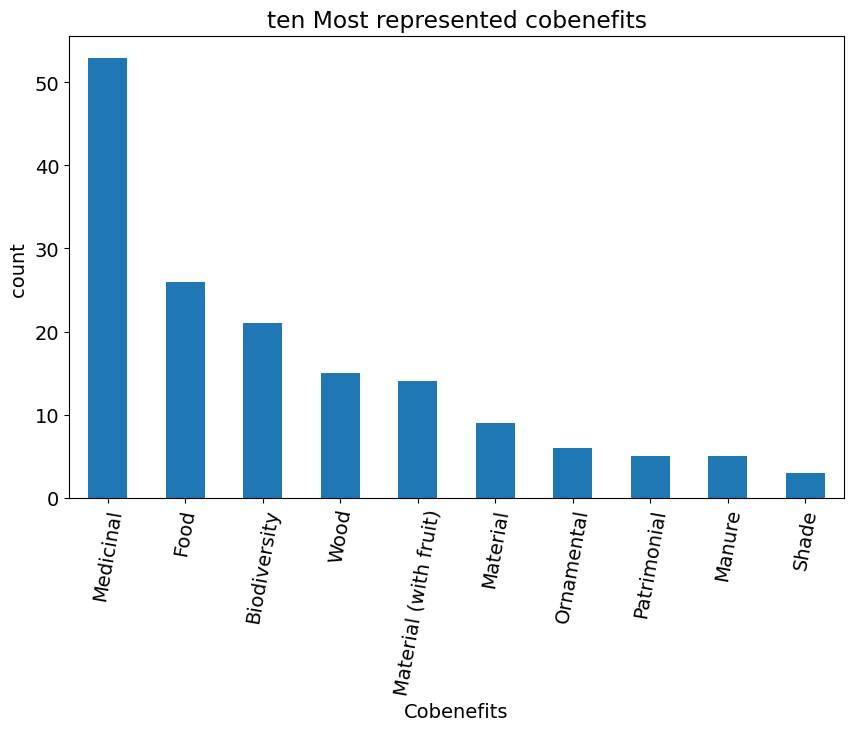

In [97]:
#plot the 10 most represented cobenefits
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
cobenefits = pd.Series(result)
most_represented_cobenefits = cobenefits.value_counts()
most_represented_cobenefits.head(10).plot(kind='bar')
plt.title('ten Most represented cobenefits')
plt.ylabel('count ')
plt.xticks(rotation=80)
plt.xlabel('Cobenefits')
plt.show()

In [100]:
#average, median and standard deviation of the size, diameter and seeds/kg columns
plant_data.describe()
plant = plant_data.iloc[1:,:]
plant = plant['SIZE'].dropna()
#pour les endroits avec intervale de valeur on prend la moyenne
result = []
for pla in plant:
    if '-' in pla:
        x = pla.split('-')
        result.append((float(x[0]) + float(x[1]))/2)
    else:
        result.append(float(pla))
#on calcule la moyene, la mediane et l'ecart type
plant= pd.Series(result)
mean = plant.mean()
median = plant.median()
std = plant.std()

print('la moyenne de size est :', mean)
print('la mediane de size est :', median)
print('l\'ecart type de size est :', std)

la moyenne de size est : 14.274725274725276
la mediane de size est : 11.0
l'ecart type de size est : 12.172565633027167
